In [1]:
#Cargamos los paquetes necesarios
import matplotlib # Para generar gráficos
import numpy as np # Para trabajar datos en forma de matriz
import pandas as pd # Visualización de datos
import seaborn as sns #Darle mayor estilo a los gráficos 
import matplotlib.pyplot as plt #Interfaz para matplotlib
from sklearn.manifold import TSNE # sklearn es una paquetería de machine learning, importamos el modulo que nos permite obtener tsnes (Representacion de variables mas importantes de un modelo)
from modlamp.descriptors import GlobalDescriptor, PeptideDescriptor # Cargamos modulos de ModlAMP para el calculo de descriptores moleculares (Propiedades fisicoquimicas)
from matplotlib import cm as cm # Para modificar los colores de los graficos realizados
import re #Modulo que nos permite  utilizar expresiones regulares en Python

In [2]:
#Leemos la base de datos y lo convertimos en un dataframe de Pandas. index_col delimita la columna que contiene los indices
amps=pd.read_csv("grampa_AA.csv", index_col=0) 

In [7]:
sec_raw=pd.Series.tolist(amps["sequence"]) #Obtenemos la columna del dataframe de Pandas (Tambien llamado Panda Series) que contiene las secuencias de la base da datos y la convertimos a una lista para poder trabajar con ella
sec=[] #Iniciamos una lista vacia donde guardaremos las secuencias unicas presentes en la base de datos 
[sec.append(x) for x in sec_raw if x not in sec] #Este metodo se conoce como List comprehension, nos permite crear listas a partir de funciones sencilals. En este caso nuestra funcion itera dentro de la lista con todas las secuencias del data frame (sec_raw) y las añade a la nueva lista con la condicion de que no se hayan añadido previamente 
len(sec) #Imprimimos la longitud de la lista sec, es decir, cuantas secuencias se encuentran dentro de esta lista

6489

In [9]:
#Este procedimiento es similar al anterior pero para los indices, lo obtuve para saber cuantos valores de MIC en total tenemos
ind=[]
[ind.append(str(amps.index[i])) for i in range(len(amps))]
len(ind)

47741

In [7]:
secs=pd.DataFrame(sec,columns=["sequence"]) #creamos una dataframe nuevo que contenga una unica columna con las secuencias separadas anteriormente, el parametro columns se usa para especificar el nombre que será colocado en la columna
secs.to_csv("./Data/GRAMPA_filt_sec.csv") #Exportamos el dataframe a un archivo csv, la función toma como argumento la carpeta y el nombre que se quiere asignar al nuevo documento

In [9]:
#Exportamos secuencias en fasta, para esto utilizamos las expresiones regulares

link2 = "./Data/GRAMPA_sec_no_filt.fasta" #Establecemos la carpeta y el nombre que tendrá nuestro archivo nuevo
ofile = open(link2, "w") #con la función open abrimos el archivo y con el parámetro "w", indicamos que escribirem sobre este
for i in range(len(sec)): #Con este loop iteraremos sobre cada una de las secuencias de la lista sec
    
    ofile.write(">GRAMPA_" + str(i+1) + "\n" + sec[i] + "\n") #Escribimos sobre el archivo el encabezado genérico + el numero que lo identifica. Con "\n" establecemos un salto de linea para poder escribir la secuencia que corresponad en la posición i
    
ofile.close() #Cerramos el archivo, dejamos de escribir sobre el

In [10]:
#Ejemplo de calculo de un descriptor global de modlamp (Indice levitt para propension a formar helices)
helix=PeptideDescriptor(sec,"levitt_alpha")
helix.calculate_global()
desc_helix=helix.descriptor
desc_helix

array([[0.8997619 ],
       [1.06344828],
       [1.12923077],
       ...,
       [1.01913043],
       [1.01311111],
       [1.06103448]])

Text(0.5, 0, 'Indice Levitt')

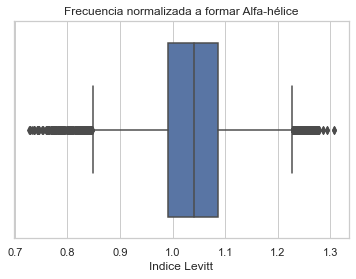

In [12]:
#Graficamos el descriptor recien calculado 
sns.set_theme(style="whitegrid") #Elegimos el estilo de la gráfica
sns.boxplot(x=amps["Helix_Levitt"]).set_title("Frecuencia normalizada a formar Alfa-hélice") # Establecemos el tipo de gráfico (Boxplot), especificando la x(es decir, los datos) y el titulo del grafico
plt.xlabel("Indice Levitt") # Colocamos la etiqueta del eje X

## Cálculo y grafico de otras propiedades (No se encuentra el codigo del calculo, pero se hace igual que la anterior)

<AxesSubplot:xlabel='charge'>

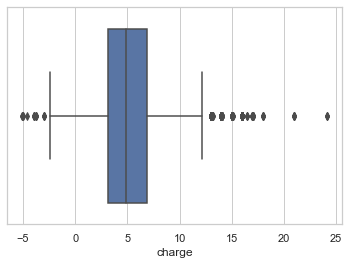

In [13]:
sns.boxplot(x=amps["charge"])

<AxesSubplot:xlabel='aromaticity'>

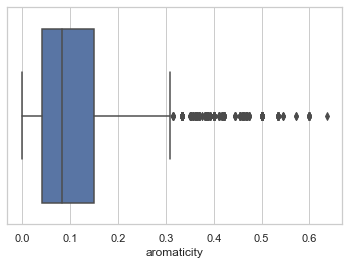

In [14]:
sns.boxplot(x=amps["aromaticity"])

<AxesSubplot:xlabel='aliphatic_index'>

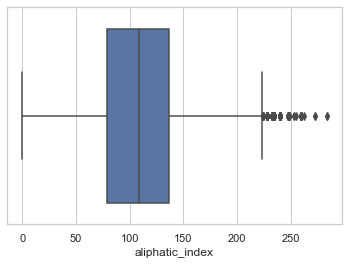

In [15]:
sns.boxplot(x=amps["aliphatic_index"])

<AxesSubplot:xlabel='hydrophobic_ratio'>

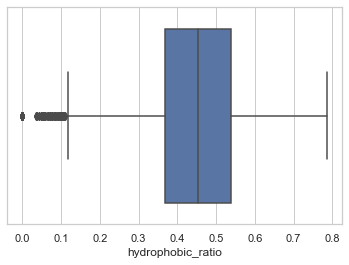

In [16]:
sns.boxplot(x=amps["hydrophobic_ratio"])

In [17]:
desc_df=amps.drop(["is_modified","has_cterminal_amidation"],axis='columns')
desc_df.corr()

,value,sequence_length,Helix_Levitt,molecular_weight,charge,aromaticity,aliphatic_index,hydrophobic_ratio
value,1.000000,-0.265471,0.029606,-0.301086,-0.282167,-0.048929,0.079471,0.076276
sequence_length,-0.265471,1.000000,-0.166286,0.971599,0.216163,-0.259064,-0.262998,-0.102510
Helix_Levitt,0.029606,-0.166286,1.000000,-0.176013,0.068951,-0.120630,0.346573,0.416006
molecular_weight,-0.301086,0.971599,-0.176013,1.000000,0.348815,-0.113266,-0.364284,-0.232764
charge,-0.282167,0.216163,0.068951,0.348815,1.000000,0.112491,-0.309619,-0.397327
aromaticity,-0.048929,-0.259064,-0.120630,-0.113266,0.112491,1.000000,-0.485717,-0.337375
aliphatic_index,0.079471,-0.262998,0.346573,-0.364284,-0.309619,-0.485717,1.000000,0.710591
hydrophobic_ratio,0.076276,-0.102510,0.416006,-0.232764,-0.397327,-0.337375,0.710591,1.000000


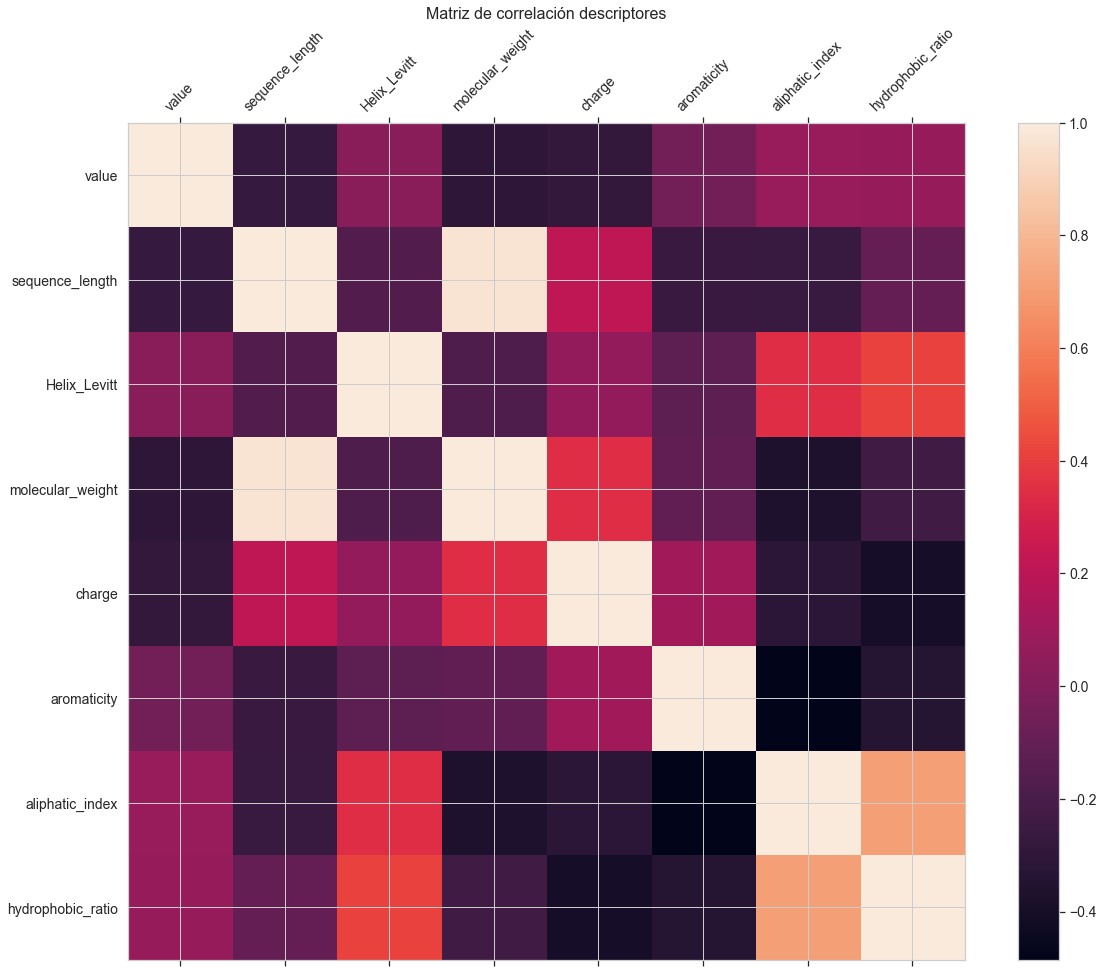

In [18]:
f = plt.figure(figsize=(19, 15))
plt.matshow(desc_df.corr(), fignum=f.number)
plt.xticks(range(desc_df.select_dtypes(['number']).shape[1]), amps.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(desc_df.select_dtypes(['number']).shape[1]), amps.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlación descriptores', fontsize=16);

In [15]:
desc_df.head()

,bacterium,modifications,sequence,strain,unit,value,sequence_length,Helix_Levitt,molecular_weight,charge,aromaticity,aliphatic_index,hydrophobic_ratio
2,S. aureus,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC29213,uM,0.566150,42.0,0.899762,4343.84,0.788,0.142857,25.714286,0.309524
7,S. aureus,[],LVKDNPLDISPKQVQALCTDLVIRCMCCC,NaN,uM,0.491362,29.0,1.063448,3221.94,0.659,0.000000,114.137931,0.551724
11,S. aureus,[],YPELQQDLIARLL,NaN,uM,0.799341,13.0,1.129231,1570.84,-0.003,0.076923,157.692308,0.461538
12,E. coli,[],YPELQQDLIARLL,NaN,uM,1.698970,13.0,1.129231,1570.84,-0.003,0.076923,157.692308,0.461538
15,S. aureus,[disulfide],GVFTLIKGATQLIGKTLGKELGKTGLELMACKITEQC,NaN,uM,0.556303,37.0,1.065676,3893.70,2.864,0.027027,108.108108,0.432432


In [16]:
model=TSNE(learning_rate=1000)

In [17]:
features_df=desc_df.drop(["bacterium","modifications","sequence","strain","unit","value"], axis="columns")

In [18]:
features=features_df.to_numpy()

In [19]:
tsne_features = model.fit_transform(features)

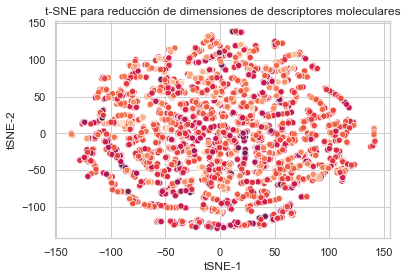

In [29]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by Helix Levitt
sns.scatterplot(x=xs,y=ys,c=amps["Helix_Levitt"],palette="colorblind")
plt.title("t-SNE para reducción de dimensiones de descriptores moleculares")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.show()